In [149]:
import pandas as pd

# reading in CSV 
betes = pd.read_csv("/Users/ayshaallahverdi/Desktop/diabetic_data.csv")

betes.head()

betes = betes.drop(['payer_code', 'patient_nbr', 'discharge_disposition_id', 'patient_nbr', 'encounter_id'], axis=1)

**EDA**

In [150]:
betes.dtypes.to_string

<bound method Series.to_string of race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
admission_source_id          int64
time_in_hospital             int64
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride                 object
acetohexamide               object
glipizide                   object
glyburide            

In [151]:
import numpy as np

betes.replace('?', np.nan, inplace=True)

perc_missing_per_ftr = betes.isnull().sum() / len(betes)

missing_features = perc_missing_per_ftr[perc_missing_per_ftr > 0]

print('Fraction of missing values in features:')
print(missing_features)

print(betes.shape)

Fraction of missing values in features:
race                 0.022336
weight               0.968585
medical_specialty    0.490822
diag_1               0.000206
diag_2               0.003518
diag_3               0.013983
max_glu_serum        0.947468
A1Cresult            0.832773
dtype: float64
(101766, 46)


In [152]:
import numpy as np

betes.replace('NA', np.nan, inplace=True)

perc_missing_per_ftr = betes.isnull().sum() / len(betes)

missing_features = perc_missing_per_ftr[perc_missing_per_ftr > 0]

print('Fraction of missing values in features:')
print(missing_features)

print(betes.shape)

Fraction of missing values in features:
race                 0.022336
weight               0.968585
medical_specialty    0.490822
diag_1               0.000206
diag_2               0.003518
diag_3               0.013983
max_glu_serum        0.947468
A1Cresult            0.832773
dtype: float64
(101766, 46)


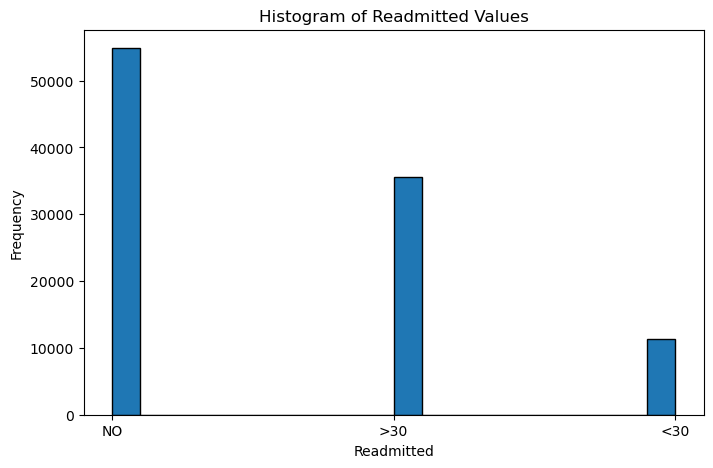

In [153]:
import matplotlib.pyplot as plt

readmitted_values = betes['readmitted']

plt.figure(figsize=(8, 5))
plt.hist(readmitted_values, bins=20, edgecolor='k')
plt.xlabel('Readmitted')
plt.ylabel('Frequency')
plt.title('Histogram of Readmitted Values')
plt.savefig("figures/target_distrib.png", dpi=300)

plt.show()

In [154]:
betes["readmitted"].value_counts()

readmitted
NO     54864
>30    35545
<30    11357
Name: count, dtype: int64

This shows the distribution of observations between readmittance rates - no means no readmittance, >30 means readmitted for more than 30 days, and <30 means readmitted for less than 30 days. 

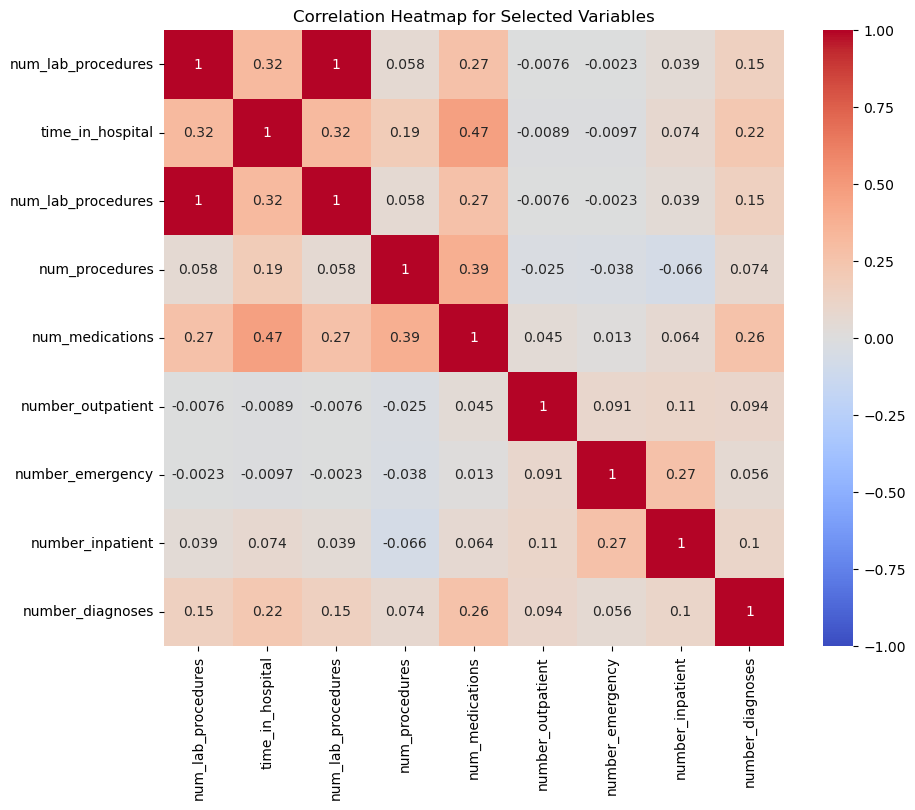

In [155]:
import seaborn as sns

vars = ['num_lab_procedures', 'time_in_hospital', 'num_lab_procedures',
                        'num_procedures', 'num_medications', 'number_outpatient',
                        'number_emergency', 'number_inpatient', 'number_diagnoses']

vars_for_corr = betes[vars]

correlation_matrix = vars_for_corr.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap for Selected Variables")
plt.savefig("figures/corr_heatmap", dpi=300)
plt.show()

Heatmap for numeric medical history variables to see if there are correlations within those who have the perliminary diabetes diagnosis. 

<Figure size 1000x600 with 0 Axes>

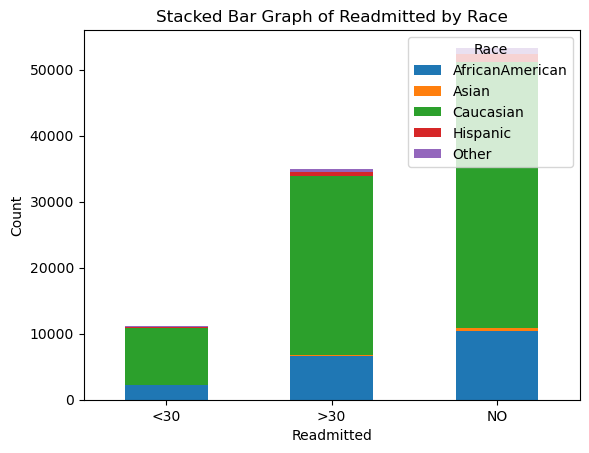

race
Caucasian          76099
AfricanAmerican    19210
Hispanic            2037
Other               1506
Asian                641
Name: count, dtype: int64

In [156]:
contingency_table = pd.crosstab(betes['readmitted'], betes['race'])

plt.figure(figsize=(10, 6))
contingency_table.plot(kind='bar', stacked=True)
plt.xlabel('Readmitted')
plt.ylabel('Count')
plt.title('Stacked Bar Graph of Readmitted by Race')
plt.legend(title='Race', loc='upper right')
plt.xticks(rotation=0)
plt.savefig("figures/read_by_race", dpi=300)
plt.show()

betes["race"].value_counts()

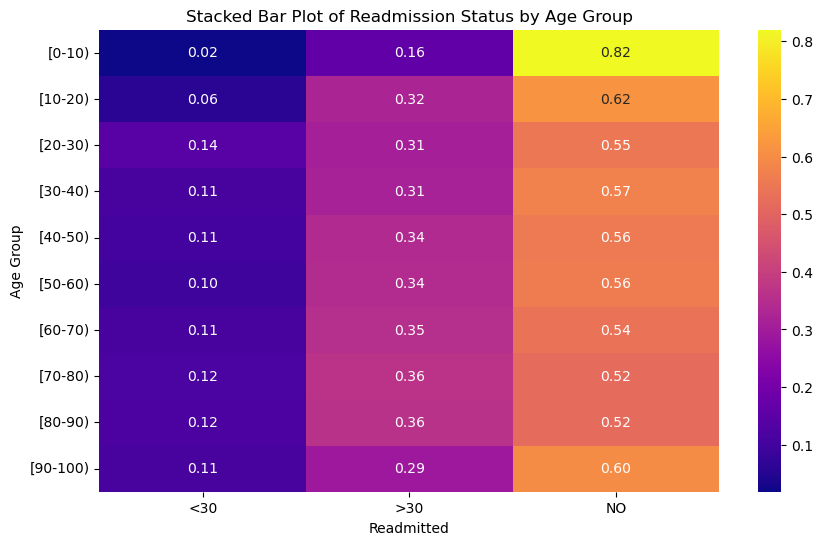

In [157]:
cross_tab = pd.crosstab(betes['age'], betes['readmitted'])

cross_tab = cross_tab.div(cross_tab.sum(1), axis=0)

plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, fmt=".2f", cmap="plasma")

plt.xlabel('Readmitted')
plt.ylabel('Age Group')
plt.title('Stacked Bar Plot of Readmission Status by Age Group')
plt.savefig("figures/stacked_by_age", dpi=300)
plt.show()


<Figure size 1000x600 with 0 Axes>

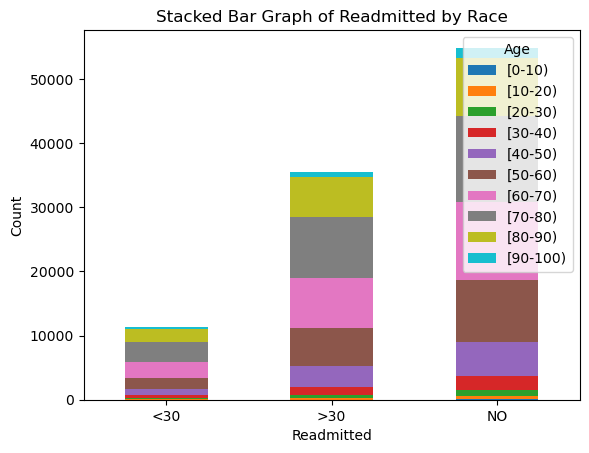

race
Caucasian          76099
AfricanAmerican    19210
Hispanic            2037
Other               1506
Asian                641
Name: count, dtype: int64

In [158]:
contingency_table = pd.crosstab(betes['readmitted'], betes['age'])

plt.figure(figsize=(10, 6))
contingency_table.plot(kind='bar', stacked=True)
plt.xlabel('Readmitted')
plt.ylabel('Count')
plt.title('Stacked Bar Graph of Readmitted by Race')
plt.legend(title='Age', loc='upper right')
plt.xticks(rotation=0)
plt.savefig("figures/read_race_stack", dpi=300)
plt.show()

betes["race"].value_counts()

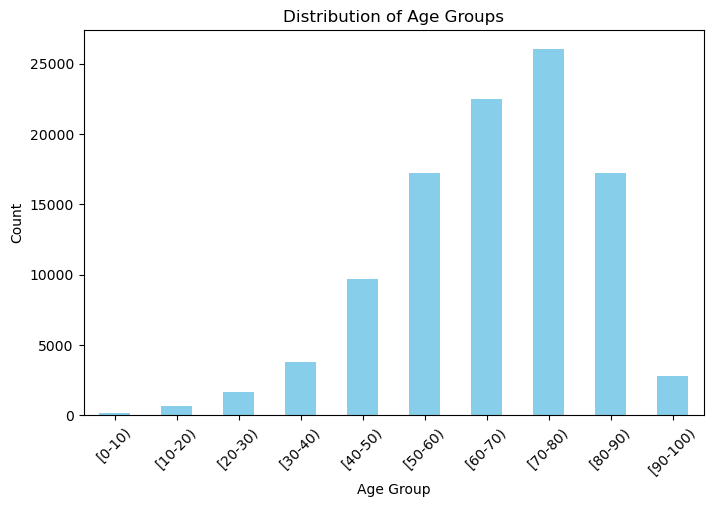

In [159]:
age_order = [
    '[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)',
    '[50-60)', '[60-70)', '[70-80)', '[80-90)', '[90-100)'
]

plt.figure(figsize=(8, 5))
betes['age'].value_counts().loc[age_order].plot(kind='bar', color='skyblue')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Distribution of Age Groups')
plt.xticks(rotation=45) 
plt.savefig("figures/age_grp_distrib", dpi=300)
plt.show()

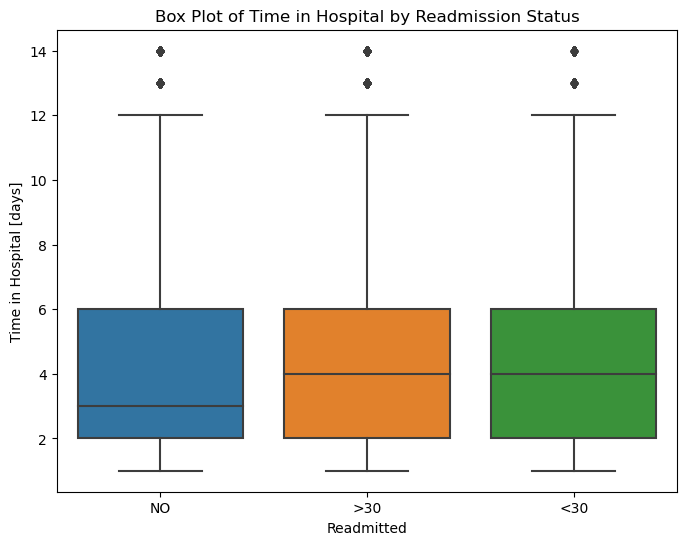

In [160]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='readmitted', y='time_in_hospital', data=betes)

plt.xlabel('Readmitted')
plt.ylabel('Time in Hospital [days]')
plt.title('Box Plot of Time in Hospital by Readmission Status')
plt.savefig("figures/time_in_hosp", dpi=300)


plt.show()

<Figure size 1000x600 with 0 Axes>

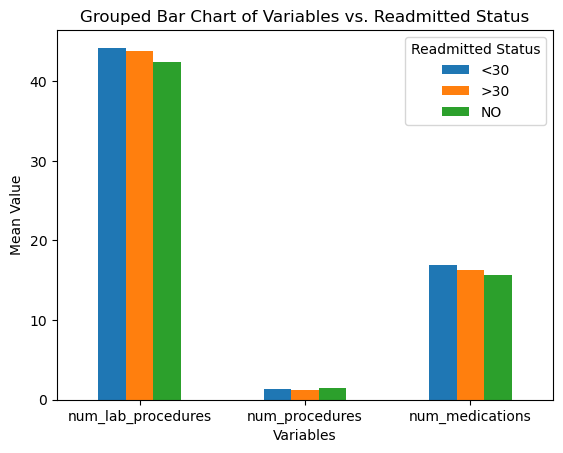

In [161]:
selected_columns = ['num_lab_procedures', 'num_procedures', 'num_medications', 'readmitted']

data = betes[selected_columns]

grouped_data = data.groupby('readmitted').mean()

grouped_data = grouped_data.T

plt.figure(figsize=(10, 6))

grouped_data.plot(kind='bar', rot=0)
plt.title('Grouped Bar Chart of Variables vs. Readmitted Status')
plt.xlabel('Variables')
plt.ylabel('Mean Value')
plt.legend(title='Readmitted Status')
plt.savefig("figures/read_by_medhist", dpi=300)


plt.show()

In [162]:
columns_to_convert = ["diag_1", "diag_2", "diag_3"]

# using lambda function to filter rows with non-numeric values in the selected columns
betes = betes[betes.apply(lambda x: x[columns_to_convert].str.isnumeric().all(), axis=1)]

In [163]:
import pandas as pd

def replace_less_common_categories(df, column, top_n):
    top_categories = df[column].value_counts().nlargest(top_n).index
    df[column] = df[column].where(df[column].isin(top_categories), 'Other')
    return df

# function applied to each of the diag columns
top_n = 20
for col in ['diag_1', 'diag_2', 'diag_3']:
    betes = replace_less_common_categories(betes, col, top_n)

#print(betes.head())
print(betes["diag_2"].value_counts())


diag_2
Other    26827
428       5802
250       5633
276       4574
427       4466
401       3311
496       2891
599       2713
411       2211
414       2116
403       1851
585       1486
491       1332
584       1331
285       1295
425       1260
486       1210
518       1185
780       1174
424        968
707        924
Name: count, dtype: int64


**SPLITTING**

In [164]:
from sklearn.model_selection import train_test_split

X = betes.drop(columns=["readmitted"])
y = betes["readmitted"]

X_train, X_other, y_train, y_other = train_test_split(X,y,train_size = 0.6,stratify=y,random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_other,y_other,train_size = 0.5,stratify=y_other,random_state=42)
print('**balance with stratification:**')

print(np.unique(y_train,return_counts=True))
print(np.unique(y_val,return_counts=True))
print(np.unique(y_test,return_counts=True))

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

X_train.to_csv('data/X_train.csv', index=False)
X_val.to_csv('data/X_val.csv', index=False)
X_test.to_csv('data/X_test.csv', index=False)
y_train.to_csv('data/y_train.csv', index=False)
y_val.to_csv('data/y_val.csv', index=False)
y_test.to_csv('data/y_test.csv', index=False)

**balance with stratification:**
(array(['<30', '>30', 'NO'], dtype=object), array([ 4707, 15225, 24804]))
(array(['<30', '>30', 'NO'], dtype=object), array([1569, 5075, 8268]))
(array(['<30', '>30', 'NO'], dtype=object), array([1569, 5075, 8268]))
(44736, 45)
(14912, 45)
(14912, 45)


**PRE-PROCESSING**

In [165]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer

ordinal_ftrs = ['age', 'weight'] 

categories_age = ['NA', '[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)', '[60-70)', '[70-80)', '[80-90)', '[90-100)']
categories_weight = ['NA', '[0-25)', '[25-50)', '[50-75)', '[75-100)', '[100-125)', '[125-150)', '[150-175)', '[175-200)', '>200']

onehot_ftrs = ['race','gender','admission_type_id',
            'admission_source_id','medical_specialty','diag_1', 'diag_2', 'diag_3', 
            'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
            'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone',
            'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin',
            'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change',
            'diabetesMed'
            ]

std_ftrs = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient',
            'number_emergency', 'number_inpatient', 'number_diagnoses',             
            ]

ordinal_transformer = Pipeline(steps=[
    ('imputer2', SimpleImputer(strategy='constant',fill_value='NA')),
    ('ordinal', OrdinalEncoder(categories = [categories_age, categories_weight]))])

preprocessor = ColumnTransformer(
    transformers=[
        ('ord', ordinal_transformer, ordinal_ftrs),
        ('onehot', OneHotEncoder(sparse=False,handle_unknown='ignore'), onehot_ftrs),
        ('std', StandardScaler(), std_ftrs)])

clf = Pipeline(steps=[('preprocessor', preprocessor)]) 

X_train_prep = clf.fit_transform(X_train)
X_val_prep = clf.transform(X_val)
X_test_prep = clf.transform(X_test)

print(X_train.shape)
print(X_train_prep.shape)

# getting the preprocessor from the pipeline
preprocessor = clf.named_steps['preprocessor']

# getting feature names for OneHotEncoder
onehot_ftrs_transformed = preprocessor.named_transformers_['onehot'].get_feature_names_out(input_features=onehot_ftrs)

# combining all feature names
all_feature_names = np.concatenate([
    ordinal_ftrs,  # ordinal features names remain the same
    onehot_ftrs_transformed,  # one-hot encoded features names
    std_ftrs  # standardized features names remain the same
])

X_train_prep_df = pd.DataFrame(X_train_prep, columns=all_feature_names)
X_val_prep_df = pd.DataFrame(X_val_prep, columns=all_feature_names)
X_test_prep_df = pd.DataFrame(X_test_prep, columns=all_feature_names)

X_train_prep_df.to_csv('data/X_train_prep.csv', index=False)
X_val_prep_df.to_csv('data/X_val_prep.csv', index=False)
X_test_prep_df.to_csv('data/X_test_prep.csv', index=False)

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.


(44736, 45)
(44736, 246)


In [166]:
diag1_counts = betes["diag_1"].value_counts()

print(diag1_counts.to_string())

diag_1
Other    32643
428       5793
414       5510
786       3261
410       3135
486       2942
427       2374
715       1887
491       1850
434       1660
780       1634
276       1457
996       1450
38        1445
682       1408
599       1315
584       1238
518       1009
562        871
435        857
493        821


**Choosing Evaluation Metric**

If the data is unbalanced, accuracy may not be a good idea as an evaluation metric. To check if imbalanced: 

In [167]:
pct_cats = betes['readmitted'].value_counts(normalize=True) * 100

print(pct_cats)

readmitted
NO     55.445279
>30    34.032994
<30    10.521727
Name: proportion, dtype: float64


F1 score may be a more appropriate evalutaion metric here. So, the baseline F1 score would be predicting everything as the majority class.

In [168]:
from sklearn.metrics import f1_score

majority_class = y_train.mode()[0]

y_pred_majority = [majority_class] * len(y_test)

f1 = f1_score(y_test, y_pred_majority, average='weighted') 

print(f"The baseline F1 Score is: {f1}")

The baseline F1 Score is: 0.39553198146989227


**ML Technique** 

In [169]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

scaler = StandardScaler().fit(X_train_prep)

X_train_scaled = scaler.transform(X_train_prep)

LogReg = LogisticRegression()
LogReg.fit(X_train_scaled, y_train)

X_test_scaled = scaler.transform(X_test_prep)

y_pred = LogReg.predict(X_test_scaled)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         <30       0.37      0.01      0.01      1569
         >30       0.49      0.28      0.36      5075
          NO       0.61      0.88      0.72      8268

    accuracy                           0.58     14912
   macro avg       0.49      0.39      0.36     14912
weighted avg       0.54      0.58      0.52     14912



Macro F1 Score: 0.36389797630944676
Micro F1 Score: 0.5849651287553648
Weighted F1 Score: 0.5223174558897711


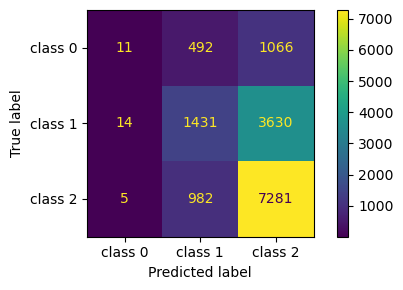

In [170]:
f1_macro = f1_score(y_test, y_pred, average='macro')
f1_micro = f1_score(y_test, y_pred, average='micro')
f1_weighted = f1_score(y_test, y_pred, average='weighted')

from sklearn.metrics import confusion_matrix

from sklearn.metrics import ConfusionMatrixDisplay

print('Macro F1 Score:', f1_macro)
print('Micro F1 Score:', f1_micro)
print('Weighted F1 Score:', f1_weighted)

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(cm, display_labels=['class 0', 'class 1', 'class 2'])
fig, ax = plt.subplots(figsize=(5, 3))
disp.plot(ax=ax)
plt.tight_layout()    
plt.savefig("figures/baseline_conf", dpi=300)
plt.show()


In [171]:
def MLpipe_GridSearch_F1(X_train, X_test, y_train, y_test, ML_algo, param_grid, cv):
    grid = GridSearchCV(ML_algo, param_grid=param_grid, scoring=make_scorer(f1_score, average='weighted'), cv=cv, return_train_score=True)
    grid.fit(X_train, y_train)

    best_model = grid.best_estimator_
    print("Best Params:", grid.best_params_)
    print("Best CV Score:", grid.best_score_)
    
    y_pred = best_model.predict(X_test)
    test_f1 = f1_score(y_test, y_pred, average='weighted')
    print("Test F1 Score:", test_f1)

    return best_model, grid.best_params_, grid.best_score_, test_f1, grid.cv_results_, grid


In [172]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, RepeatedKFold, GridSearchCV
from sklearn.metrics import f1_score, make_scorer
import numpy as np

ML_algo_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=5000, solver='lbfgs'))
])

param_grid_lr = {
    'logreg__C': np.logspace(-3, 3, 7),
    'logreg__penalty': ['l2']
}

best_models = []
test_scores = []

for state in range(10):
    X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(
        X_train_prep, y_train, test_size=0.2, random_state=state
    )

    cv_lr = RepeatedKFold(n_splits=5, n_repeats=3, random_state=state)

    grid_lr = GridSearchCV(
        ML_algo_lr, param_grid_lr, scoring=make_scorer(f1_score, average='weighted'), cv=cv_lr, return_train_score=True
    )
    grid_lr.fit(X_train_split, y_train_split)

    best_model = grid_lr.best_estimator_
    best_params = grid_lr.best_params_
    print(f"Random State {state}: Best Parameters - {best_params}")

    test_f1 = f1_score(y_test_split, best_model.predict(X_test_split), average='weighted')
    test_scores.append(test_f1)
    best_models.append(best_model)

print("Test F1 Scores for different random states:", test_scores)
print("Mean Test F1 Score:", np.mean(test_scores))
print("Standard Deviation of Test F1 Scores:", np.std(test_scores))


Random State 0: Best Parameters - {'logreg__C': 0.1, 'logreg__penalty': 'l2'}
Random State 1: Best Parameters - {'logreg__C': 10.0, 'logreg__penalty': 'l2'}
Random State 2: Best Parameters - {'logreg__C': 100.0, 'logreg__penalty': 'l2'}
Random State 3: Best Parameters - {'logreg__C': 1000.0, 'logreg__penalty': 'l2'}
Random State 4: Best Parameters - {'logreg__C': 1000.0, 'logreg__penalty': 'l2'}
Random State 5: Best Parameters - {'logreg__C': 100.0, 'logreg__penalty': 'l2'}
Random State 6: Best Parameters - {'logreg__C': 1.0, 'logreg__penalty': 'l2'}
Random State 7: Best Parameters - {'logreg__C': 1000.0, 'logreg__penalty': 'l2'}
Random State 8: Best Parameters - {'logreg__C': 100.0, 'logreg__penalty': 'l2'}
Random State 9: Best Parameters - {'logreg__C': 10.0, 'logreg__penalty': 'l2'}
Test F1 Scores for different random states: [0.5267332688311808, 0.5194792060009424, 0.5216584803042155, 0.5210904222063525, 0.5235281052910835, 0.5238300477131235, 0.5221346721824446, 0.5233502675977961

In [173]:
import pickle

# model using pickle
with open('results/best_model_lr.pkl', 'wb') as file:
    pickle.dump(best_model_lr, file)

# pred
y_test_pred_lr = best_model_lr.predict(X_test_prep)

with open('results/y_test_pred_lr.pkl', 'wb') as file:
    pickle.dump(y_test_pred_lr, file)


In [174]:
file_path = '/Users/ayshaallahverdi/Desktop/D1030 Project/Predicting-Diabetes-Readmission/figures/feature_importances.png'

In [175]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RepeatedKFold, GridSearchCV
from sklearn.metrics import f1_score, make_scorer
import numpy as np

ML_algo_rf = RandomForestClassifier(n_jobs=-1)

param_grid_rf_expanded = {
    'n_estimators': [100, 300, 500],
    'max_depth': [None, 30, 50],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 4, 6],
    'max_features': ['sqrt', 'log2', None],
    'class_weight': [None, 'balanced']
}

best_models_rf = []
test_scores_rf = []

for state in range(10):
    X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(
        X_train_prep, y_train, test_size=0.2, random_state=state
    )

    cv_rf = RepeatedKFold(n_splits=5, n_repeats=3, random_state=state)

    grid_rf = GridSearchCV(
        ML_algo_rf, param_grid_rf_expanded, scoring=make_scorer(f1_score, average='weighted'), cv=cv_rf, return_train_score=True, n_jobs=-1
    )
    grid_rf.fit(X_train_split, y_train_split)

    best_model_rf = grid_rf.best_estimator_
    best_params_rf = grid_rf.best_params_
    print(f"Random State {state}: Best Parameters - {best_params_rf}")

    test_f1_rf = f1_score(y_test_split, best_model_rf.predict(X_test_split), average='weighted')
    test_scores_rf.append(test_f1_rf)
    best_models_rf.append(best_model_rf)

print("Test F1 Scores for different random states (RF):", test_scores_rf)
print("Mean Test F1 Score (RF):", np.mean(test_scores_rf))
print("Standard Deviation of Test F1 Scores (RF):", np.std(test_scores_rf))

In [176]:
import pickle

# model using pickle
with open('results/best_model_rf.pkl', 'wb') as file:
    pickle.dump(best_model_rf, file)

# pred
y_test_pred_rf = best_model_rf.predict(X_test_prep)

with open('results/y_test_pred_rf.pkl', 'wb') as file:
    pickle.dump(y_test_pred_rf, file)


In [177]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import numpy as np

best_params_rf = {
    'class_weight': 'balanced', 
    'max_depth': None, 
    'max_features': 'sqrt', 
    'min_samples_leaf': 1, 
    'min_samples_split': 20, 
    'n_estimators': 500
}

test_scores_rf = []
best_models_rf = []

for state in range(10):
    X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(
        X_train_prep, y_train, test_size=0.2, random_state=state
    )

    model_rf = RandomForestClassifier(n_jobs=-1, random_state=state, **best_params_rf)
    model_rf.fit(X_train_split, y_train_split)

    y_pred = model_rf.predict(X_test_split)
    test_f1_rf = f1_score(y_test_split, y_pred, average='weighted')

    test_scores_rf.append(test_f1_rf)
    best_models_rf.append(model_rf)

    print(f"Random State {state}: Test F1 Score - {test_f1_rf}")

mean_test_f1_rf = np.mean(test_scores_rf)
std_test_f1_rf = np.std(test_scores_rf)
print("Mean Test F1 Score (RF):", mean_test_f1_rf)
print("Standard Deviation of Test F1 Scores (RF):", std_test_f1_rf)


Random State 0: Test F1 Score - 0.5541351524749248
Random State 1: Test F1 Score - 0.5532493501326192
Random State 2: Test F1 Score - 0.5503880181168253
Random State 3: Test F1 Score - 0.5461401225042559
Random State 4: Test F1 Score - 0.5468387504151008
Random State 5: Test F1 Score - 0.5559937754152611
Random State 6: Test F1 Score - 0.5503723563724636
Random State 7: Test F1 Score - 0.5523178935946351
Random State 8: Test F1 Score - 0.5510972915976425
Random State 9: Test F1 Score - 0.5578388318251036
Mean Test F1 Score (RF): 0.5518371542448831
Standard Deviation of Test F1 Scores (RF): 0.0035076640846115103


In [178]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import f1_score
import numpy as np

param_grid_gb = {
    'n_estimators': [100, 200],  
    'learning_rate': [0.01, 0.1], 
    'max_depth': [3, 5],  
    'min_samples_split': [2, 4],  
    'min_samples_leaf': [1, 2]  
}

test_scores_gb = []
best_models_gb = []

for state in range(7):
    X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(
        X_train_prep, y_train, test_size=0.2, random_state=state
    )

    grid_gb = GridSearchCV(
        GradientBoostingClassifier(random_state=state), 
        param_grid=param_grid_gb, 
        scoring='f1_weighted',
        cv=5, 
        return_train_score=True
    )

    grid_gb.fit(X_train_split, y_train_split)

    best_model_gb = grid_gb.best_estimator_
    y_pred_gb = best_model_gb.predict(X_test_split)
    test_f1_gb = f1_score(y_test_split, y_pred_gb, average='weighted')

    test_scores_gb.append(test_f1_gb)
    best_models_gb.append(best_model_gb)

    print(f"Random State {state}: Test F1 Score - {test_f1_gb}")

mean_test_f1_gb = np.mean(test_scores_gb)
std_test_f1_gb = np.std(test_scores_gb)
print("Mean Test F1 Score (GB):", mean_test_f1_gb)
print("Standard Deviation of Test F1 Scores (GB):", std_test_f1_gb)


Random State 0: Test F1 Score - 0.5398593649619012
Random State 1: Test F1 Score - 0.5265437956055268
Random State 2: Test F1 Score - 0.5365201175796406
Random State 3: Test F1 Score - 0.5349182476077724
Random State 4: Test F1 Score - 0.534912782994815
Random State 5: Test F1 Score - 0.5361712189537942
Random State 6: Test F1 Score - 0.5384030951915106
Random State 7: Test F1 Score - 0.5394105143828892
Random State 8: Test F1 Score - 0.5342646511889995
Random State 9: Test F1 Score - 0.5375549653249898
Mean Test F1 Score (GB): 0.535855875379184
Standard Deviation of Test F1 Scores (GB): 0.0035999260435502336


In [179]:
import pickle

with open('results/best_model_gb.pkl', 'wb') as file:
    pickle.dump(best_model_gb, file)

y_test_pred_gb = best_model_gb.predict(X_test_prep)

with open('results/y_test_pred_gb.pkl', 'wb') as file:
    pickle.dump(y_test_pred_gb, file)


In [180]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import f1_score
import numpy as np

param_grid_svc = {
    'svc__C': [1, 10],
    'svc__kernel': ['rbf'],
    'svc__gamma': ['scale']
}

test_scores_svc = []
best_models_svc = []

for state in range(3):
    X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(
        X_train_prep, y_train, test_size=0.2, random_state=state
    )

    ML_algo_svc = Pipeline([
        ('scaler', StandardScaler()),
        ('svc', SVC(random_state=state))
    ])

    grid_svc = GridSearchCV(
        ML_algo_svc, 
        param_grid=param_grid_svc, 
        scoring='f1_weighted',
        cv=5, 
        return_train_score=True
    )

    grid_svc.fit(X_train_split, y_train_split)

    best_model_svc = grid_svc.best_estimator_
    y_pred_svc = best_model_svc.predict(X_test_split)
    test_f1_svc = f1_score(y_test_split, y_pred_svc, average='weighted')

    test_scores_svc.append(test_f1_svc)
    best_models_svc.append(best_model_svc)

    print(f"Random State {state}: Test F1 Score - {test_f1_svc}")

mean_test_f1_svc = np.mean(test_scores_svc)
std_test_f1_svc = np.std(test_scores_svc)
print("Mean Test F1 Score (SVC):", mean_test_f1_svc)
print("Standard Deviation of Test F1 Scores (SVC):", std_test_f1_svc)


Random State 0: Test F1 Score - 0.5294356751803792
Random State 1: Test F1 Score - 0.5108971859981114
Random State 2: Test F1 Score - 0.5199156700472625
Mean Test F1 Score (SVC): 0.5200828437419177
Standard Deviation of Test F1 Scores (SVC): 0.007569229620571395


In [181]:
import pickle

with open('results/best_model_svc.pkl', 'wb') as file:
    pickle.dump(best_model_svc, file)

y_test_pred_svc = best_model_svc.predict(X_test_prep)

with open('results/y_test_pred_svc.pkl', 'wb') as file:
    pickle.dump(y_test_pred_svc, file)


In [194]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import f1_score
import numpy as np

param_grid_knn = {
    'knn__n_neighbors': [3, 5, 7, 10],
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['euclidean', 'manhattan']
}

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

test_scores_knn = []
best_models_knn = []

for state in range(3):
    X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(
        X_train_prep, y_train_encoded, test_size=0.2, random_state=state
    )

    ML_algo_knn = Pipeline([
        ('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier())
    ])

    grid_knn = GridSearchCV(
        ML_algo_knn, 
        param_grid=param_grid_knn, 
        scoring='f1_weighted',
        cv=5,
        return_train_score=True
    )

    grid_knn.fit(X_train_split, y_train_split)

    best_model_knn = grid_knn.best_estimator_
    y_pred_knn = best_model_knn.predict(X_test_split)
    
    y_pred_knn = label_encoder.inverse_transform(y_pred_knn)
    y_test_split = label_encoder.inverse_transform(y_test_split)

    test_f1_knn = f1_score(y_test_split, y_pred_knn, average='weighted')

    test_scores_knn.append(test_f1_knn)
    best_models_knn.append(best_model_knn)

    print(f"Random State {state}: Test F1 Score - {test_f1_knn}")

mean_test_f1_knn = np.mean(test_scores_knn)
std_test_f1_knn = np.std(test_scores_knn)
print("Mean Test F1 Score (KNN):", mean_test_f1_knn)
print("Standard Deviation of Test F1 Scores (KNN):", std_test_f1_knn)


Random State 0: Test F1 Score - 0.5023873399845501
Random State 1: Test F1 Score - 0.48522082039444125
Random State 2: Test F1 Score - 0.5015698577399562
Mean Test F1 Score (KNN): 0.4963926727063159
Standard Deviation of Test F1 Scores (KNN): 0.007906738997581323


In [183]:
import pickle

with open('results/best_model_knn.pkl', 'wb') as file:
    pickle.dump(best_model_knn, file)

y_test_pred_knn = best_model_knn.predict(X_test_prep)

with open('results/y_test_pred_knn.pkl', 'wb') as file:
    pickle.dump(y_test_pred_knn, file)


log reg results

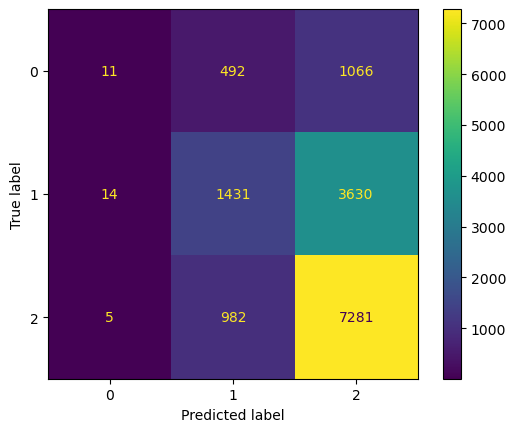

In [184]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def plot_confusion_matrix(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.savefig("lr_conf_matrix", dpi=300)
    plt.show()

plot_confusion_matrix(best_model_lr, X_test_prep, y_test)


gb results

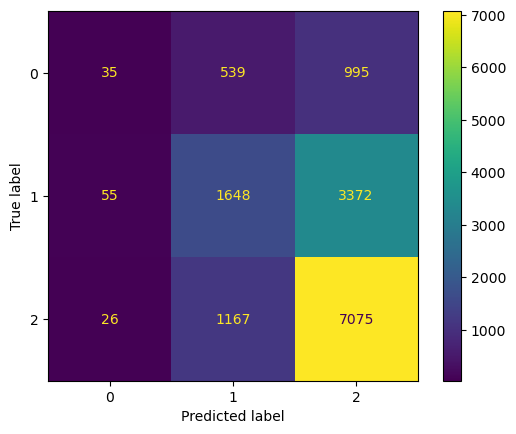

In [185]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def plot_confusion_matrix(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.savefig("gb_conf_matrix", dpi=300)
    plt.show()

plot_confusion_matrix(best_model_gb, X_test_prep, y_test)


random forest results

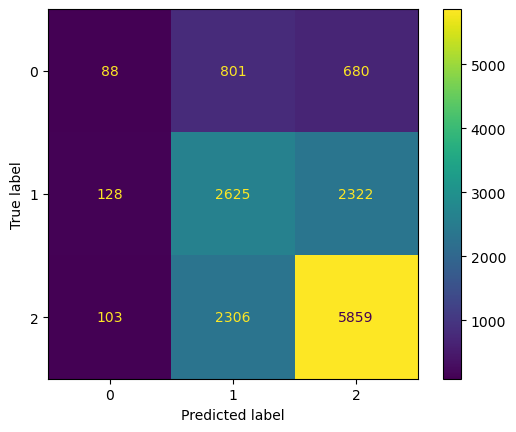

In [186]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def plot_confusion_matrix(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.savefig("figures/rf_conf_matrix", dpi=300)
    
    plt.show()

plot_confusion_matrix(best_model_rf, X_test_prep, y_test)


knn results

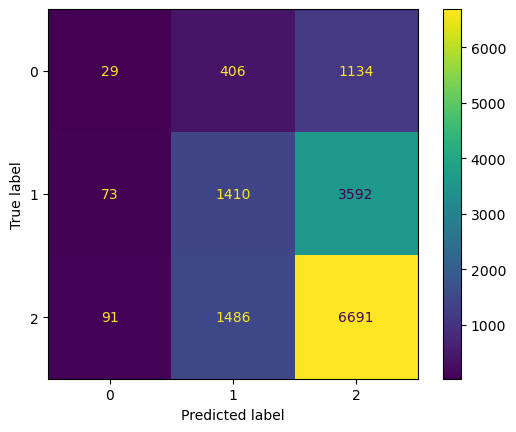

In [187]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def plot_confusion_matrix(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.savefig("figures/knn_conf_matrix", dpi=300)
    plt.show()

plot_confusion_matrix(best_model_knn, X_test_prep, y_test)


svc results

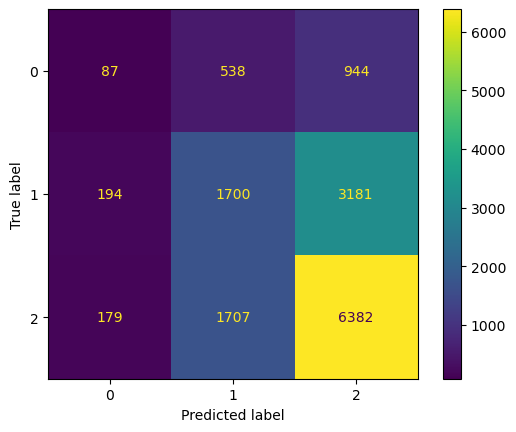

In [188]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def plot_confusion_matrix(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.savefig("figures/svc_conf_matrix", dpi=300)
    plt.show()

plot_confusion_matrix(best_model_svc, X_test_prep, y_test)


In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.dummy import DummyClassifier
from sklearn.metrics import f1_score
import numpy as np

baseline_model = DummyClassifier(strategy="most_frequent")

kf = KFold(n_splits=5) 

f1_baseline_scores = cross_val_score(baseline_model, X, y, cv=kf, scoring='f1_weighted')
mean_f1_baseline = np.mean(f1_baseline_scores)
std_f1_baseline = np.std(f1_baseline_scores)

print("Baseline F1 scores from cross-validation:", f1_baseline_scores)
print("Mean F1 Score for baseline:", mean_f1_baseline)
print("Standard Deviation of F1 Scores for baseline:", std_f1_baseline)

# comparing models f score
model_f = best_cv_score_lr

# comparing to baseline
if std_f1_baseline > 0:
    deviation_from_baseline = (model_f - mean_f1_baseline) / std_f1_baseline
    print(f"Model's F1 Score is {deviation_from_baseline:.2f} standard deviations away from the baseline mean.")
else:
    print("Standard deviation of baseline F1 scores is zero, comparison not possible.")


Baseline F1 scores from cross-validation: [0.3960824  0.4347778  0.32731547 0.35387111 0.4708829 ]
Mean F1 Score for baseline: 0.39658593612974735
Standard Deviation of F1 Scores for baseline: 0.052157192189103474
Model's F1 Score is 2.44 standard deviations away from the baseline mean.


In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.dummy import DummyClassifier
from sklearn.metrics import f1_score
import numpy as np

baseline_model = DummyClassifier(strategy="most_frequent")

kf = KFold(n_splits=5)  

f1_baseline_scores = cross_val_score(baseline_model, X, y, cv=kf, scoring='f1_weighted')
mean_f1_baseline = np.mean(f1_baseline_scores)
std_f1_baseline = np.std(f1_baseline_scores)

print("Baseline F1 scores from cross-validation:", f1_baseline_scores)
print("Mean F1 Score for baseline:", mean_f1_baseline)
print("Standard Deviation of F1 Scores for baseline:", std_f1_baseline)

model_f = best_cv_score_rf

if std_f1_baseline > 0:
    deviation_from_baseline = (model_f - mean_f1_baseline) / std_f1_baseline
    print(f"Model's F1 Score is {deviation_from_baseline:.2f} standard deviations away from the baseline mean.")
else:
    print("Standard deviation of baseline F1 scores is zero, comparison not possible.")


Baseline F1 scores from cross-validation: [0.3960824  0.4347778  0.32731547 0.35387111 0.4708829 ]
Mean F1 Score for baseline: 0.39658593612974735
Standard Deviation of F1 Scores for baseline: 0.052157192189103474
Model's F1 Score is 3.01 standard deviations away from the baseline mean.


In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.dummy import DummyClassifier
from sklearn.metrics import f1_score
import numpy as np


baseline_model = DummyClassifier(strategy="most_frequent")

kf = KFold(n_splits=5) 

f1_baseline_scores = cross_val_score(baseline_model, X, y, cv=kf, scoring='f1_weighted')
mean_f1_baseline = np.mean(f1_baseline_scores)
std_f1_baseline = np.std(f1_baseline_scores)

print("Baseline F1 scores from cross-validation:", f1_baseline_scores)
print("Mean F1 Score for baseline:", mean_f1_baseline)
print("Standard Deviation of F1 Scores for baseline:", std_f1_baseline)

model_f = best_cv_score_knn

if std_f1_baseline > 0:
    deviation_from_baseline = (model_f - mean_f1_baseline) / std_f1_baseline
    print(f"Model's F1 Score is {deviation_from_baseline:.2f} standard deviations away from the baseline mean.")
else:
    print("Standard deviation of baseline F1 scores is zero, comparison not possible.")


Baseline F1 scores from cross-validation: [0.3960824  0.4347778  0.32731547 0.35387111 0.4708829 ]
Mean F1 Score for baseline: 0.39658593612974735
Standard Deviation of F1 Scores for baseline: 0.052157192189103474
Model's F1 Score is 2.29 standard deviations away from the baseline mean.


In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.dummy import DummyClassifier
from sklearn.metrics import f1_score
import numpy as np

baseline_model = DummyClassifier(strategy="most_frequent")

kf = KFold(n_splits=5) 

f1_baseline_scores = cross_val_score(baseline_model, X, y, cv=kf, scoring='f1_weighted')
mean_f1_baseline = np.mean(f1_baseline_scores)
std_f1_baseline = np.std(f1_baseline_scores)

print("Baseline F1 scores from cross-validation:", f1_baseline_scores)
print("Mean F1 Score for baseline:", mean_f1_baseline)
print("Standard Deviation of F1 Scores for baseline:", std_f1_baseline)

model_f = best_cv_score_svc

if std_f1_baseline > 0:
    deviation_from_baseline = (model_f - mean_f1_baseline) / std_f1_baseline
    print(f"Model's F1 Score is {deviation_from_baseline:.2f} standard deviations away from the baseline mean.")
else:
    print("Standard deviation of baseline F1 scores is zero, comparison not possible.")


Baseline F1 scores from cross-validation: [0.3960824  0.4347778  0.32731547 0.35387111 0.4708829 ]
Mean F1 Score for baseline: 0.39658593612974735
Standard Deviation of F1 Scores for baseline: 0.052157192189103474
Model's F1 Score is 2.45 standard deviations away from the baseline mean.


In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.dummy import DummyClassifier
from sklearn.metrics import f1_score
import numpy as np

baseline_model = DummyClassifier(strategy="most_frequent")

kf = KFold(n_splits=5)  

f1_baseline_scores = cross_val_score(baseline_model, X, y, cv=kf, scoring='f1_weighted')
mean_f1_baseline = np.mean(f1_baseline_scores)
std_f1_baseline = np.std(f1_baseline_scores)

print("Baseline F1 scores from cross-validation:", f1_baseline_scores)
print("Mean F1 Score for baseline:", mean_f1_baseline)
print("Standard Deviation of F1 Scores for baseline:", std_f1_baseline)

model_f = best_cv_score_gb

if std_f1_baseline > 0:
    deviation_from_baseline = (model_f - mean_f1_baseline) / std_f1_baseline
    print(f"Model's F1 Score is {deviation_from_baseline:.2f} standard deviations away from the baseline mean.")
else:
    print("Standard deviation of baseline F1 scores is zero, comparison not possible.")


Baseline F1 scores from cross-validation: [0.3960824  0.4347778  0.32731547 0.35387111 0.4708829 ]
Mean F1 Score for baseline: 0.39658593612974735
Standard Deviation of F1 Scores for baseline: 0.052157192189103474
Model's F1 Score is 2.73 standard deviations away from the baseline mean.


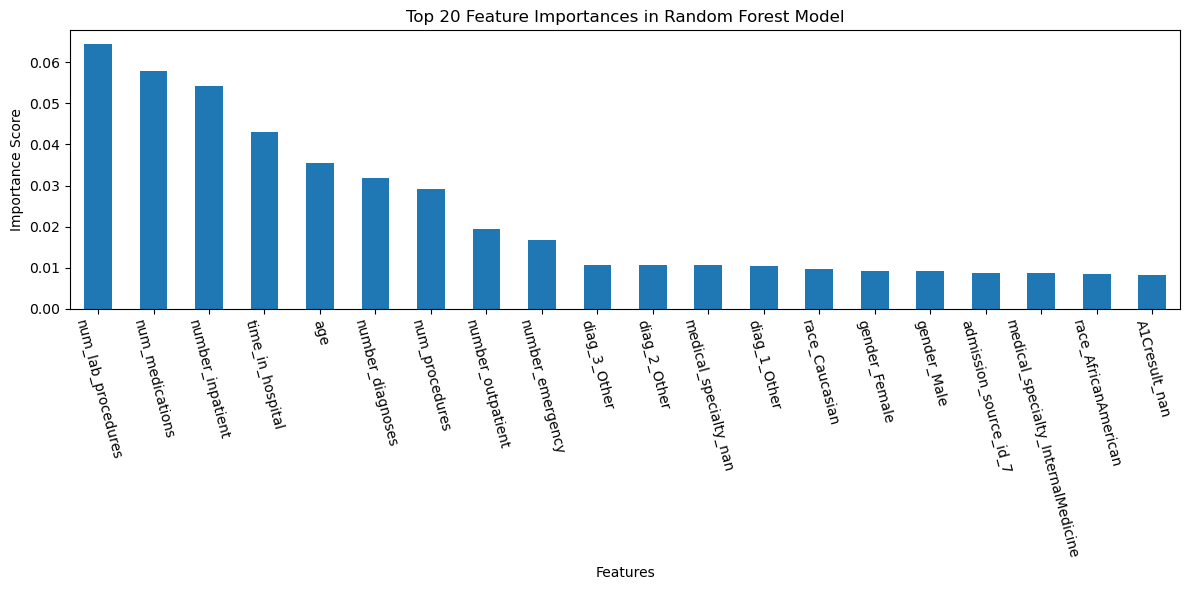

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

feature_importances_rf = best_model_rf.feature_importances_

feature_importance_rf = pd.Series(feature_importances_rf, index=all_feature_names)

top_n = 20

sorted_feature_importance = feature_importance_rf.sort_values(ascending=False)
top_features = sorted_feature_importance.head(top_n)

plt.figure(figsize=(12, 6))
top_features.plot(kind='bar')
plt.title(f'Top {top_n} Feature Importances in Random Forest Model')
plt.ylabel('Importance Score')
plt.xlabel('Features')
plt.xticks(rotation=285, ha='center')  
plt.tight_layout()  
plt.savefig('figures/feature_importance', dpi=300)
plt.show()


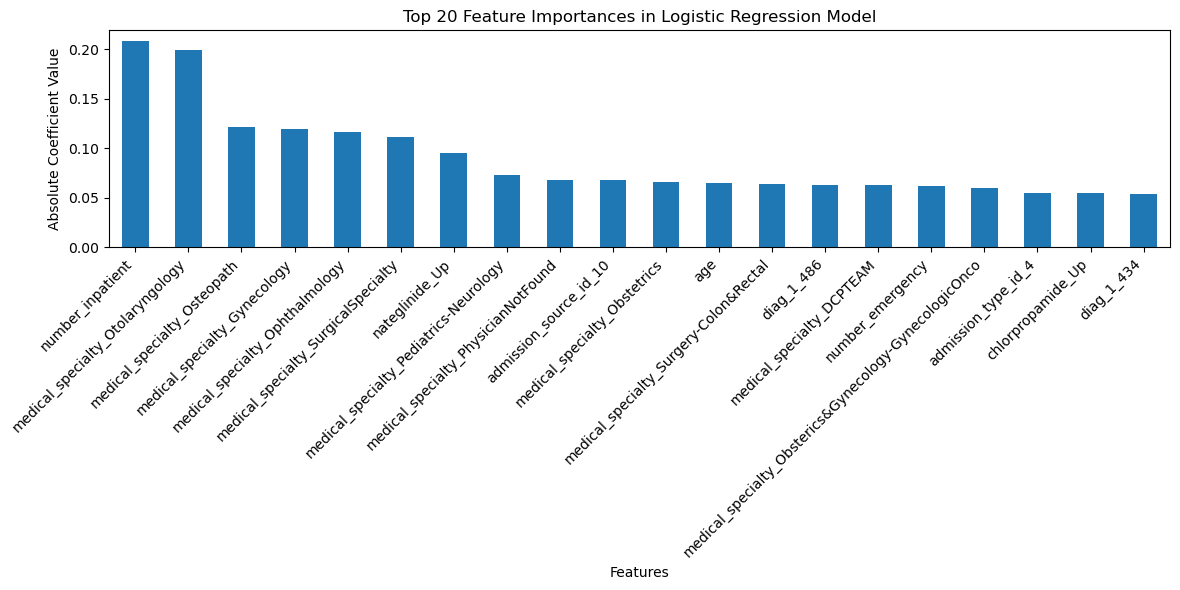

In [200]:
import pandas as pd
import matplotlib.pyplot as plt

logreg_coefs = best_model_lr.named_steps['logreg'].coef_[0]

feature_importance_lr = pd.Series(logreg_coefs, index=all_feature_names)

top_n = 20

sorted_feature_importance = feature_importance_lr.abs().sort_values(ascending=False)
top_features = sorted_feature_importance.head(top_n)

plt.figure(figsize=(12, 6))
top_features.plot(kind='bar')
plt.title(f'Top {top_n} Feature Importances in Logistic Regression Model')
plt.ylabel('Absolute Coefficient Value')
plt.xlabel('Features')
plt.xticks(rotation=45, ha='right')  # Adjust rotation and alignment as needed
plt.tight_layout()
plt.savefig('figures/logreg_feature_importance.png', dpi=300)
plt.show()


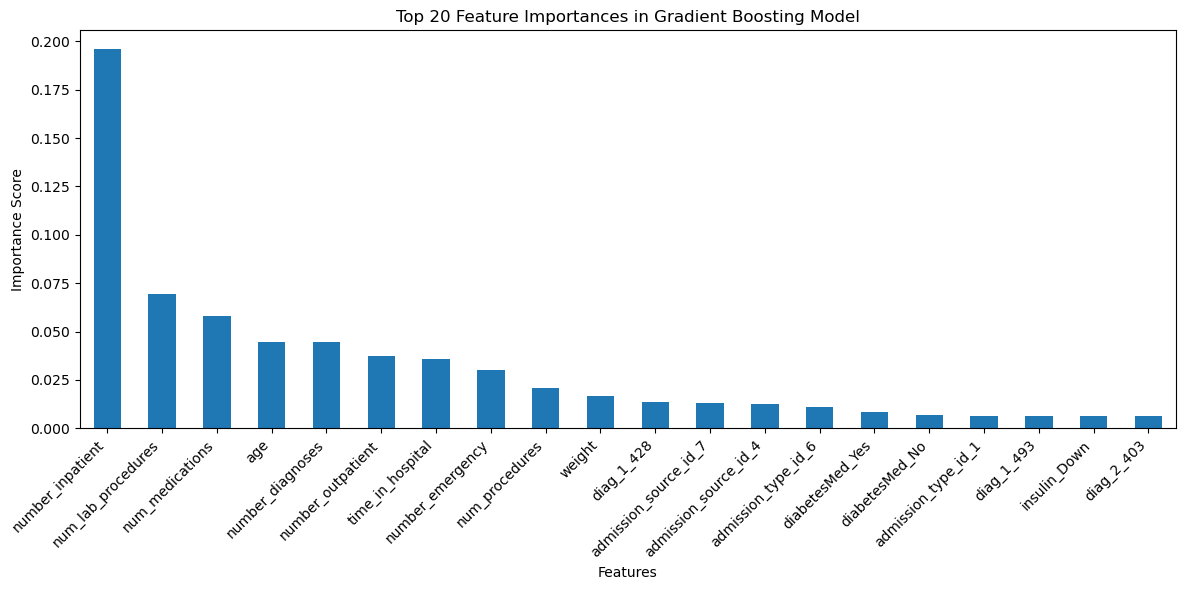

In [190]:
import pandas as pd
import matplotlib.pyplot as plt

feature_importances_gb = best_model_gb.feature_importances_

feature_importance_gb = pd.Series(feature_importances_gb, index=all_feature_names)

top_n = 20

sorted_feature_importance = feature_importance_gb.sort_values(ascending=False)
top_features = sorted_feature_importance.head(top_n)

plt.figure(figsize=(12, 6))
top_features.plot(kind='bar')
plt.title(f'Top {top_n} Feature Importances in Gradient Boosting Model')
plt.ylabel('Importance Score')
plt.xlabel('Features')
plt.xticks(rotation=45, ha='right')  # Adjust rotation and alignment as needed
plt.tight_layout()
plt.savefig('figures/gradient_boosting_feature_importance.png', dpi=300)
plt.show()


In [ ]:
shap.initjs()


In [191]:
import shap

X_test_prep_df = pd.DataFrame(X_test_prep, columns=all_feature_names)

instance = X_test_prep_df.iloc[[42]]

explainer = shap.TreeExplainer(best_model_rf)

shap_values_instance = explainer.shap_values(instance)

shap.initjs()

selected_class = 0
print("Expected Value:", explainer.expected_value[selected_class])

shap.force_plot(
    explainer.expected_value[selected_class], 
    shap_values_instance[selected_class], 
    features=instance, 
    feature_names=all_feature_names
)


Expected Value: 0.33324921900464766


In [192]:
import shap
import pandas as pd

if not isinstance(X_test_prep, pd.DataFrame):
    X_test_prep_df = pd.DataFrame(X_test_prep, columns=all_feature_names)
else:
    X_test_prep_df = X_test_prep

# shap explainer
explainer = shap.TreeExplainer(best_model_rf)

# 100 samples
shap_sample = shap.sample(X_test_prep_df, 100)

# shap for samples
shap_values = explainer.shap_values(shap_sample)

# visualize
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1][0], shap_sample.iloc[0])


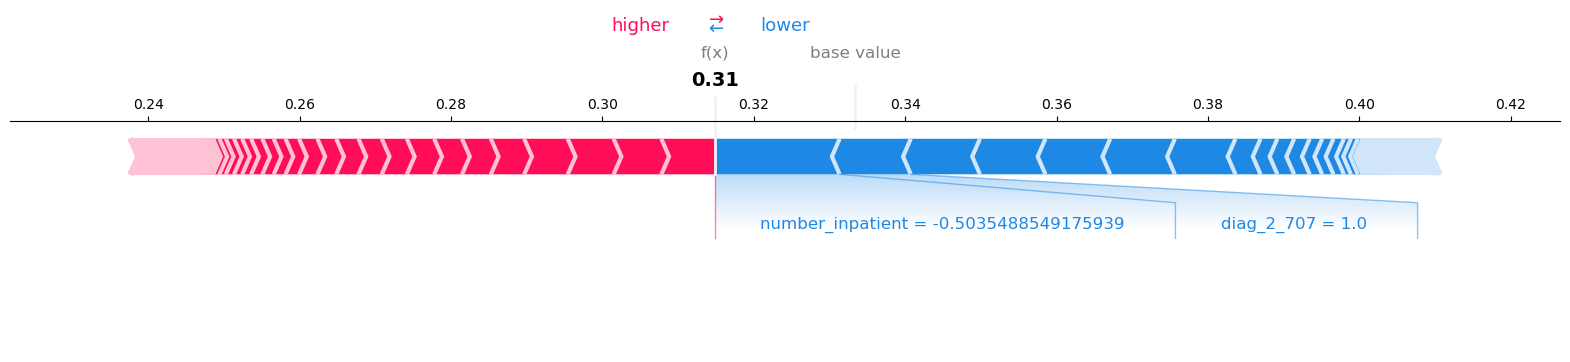

<Figure size 640x480 with 0 Axes>

In [199]:
import shap
import pandas as pd
import matplotlib.pyplot as plt

if not isinstance(X_test_prep, pd.DataFrame):
    X_test_prep_df = pd.DataFrame(X_test_prep, columns=all_feature_names)
else:
    X_test_prep_df = X_test_prep

# shap explainer
explainer = shap.TreeExplainer(best_model_rf)

# 100 samples
shap_sample = shap.sample(X_test_prep_df, 100)

# shap for samples
shap_values = explainer.shap_values(shap_sample)

# Convert SHAP force plot to matplotlib figure
shap_plot = shap.force_plot(explainer.expected_value[1], shap_values[1][0], shap_sample.iloc[0], matplotlib=True)

# Save the plot
plt.savefig("figures/shap_force_plot.png", bbox_inches='tight')


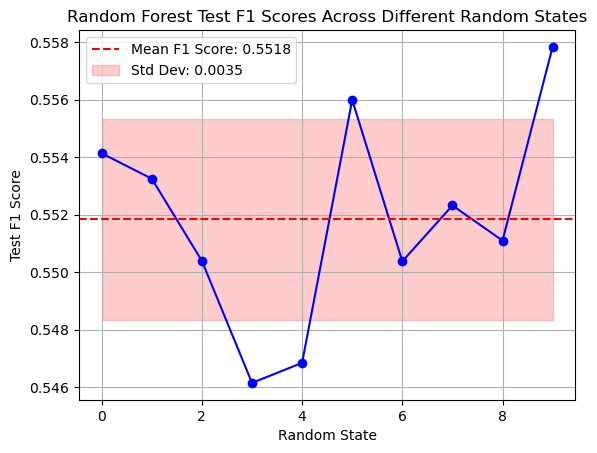

In [198]:
import matplotlib.pyplot as plt

plt.plot(range(10), test_scores_rf, marker='o', linestyle='-', color='b')
plt.title('Random Forest Test F1 Scores Across Different Random States')
plt.xlabel('Random State')
plt.ylabel('Test F1 Score')
plt.grid(True)

plt.axhline(y=mean_test_f1_rf, color='r', linestyle='--', label=f'Mean F1 Score: {mean_test_f1_rf:.4f}')
plt.fill_between(range(10), mean_test_f1_rf - std_test_f1_rf, mean_test_f1_rf + std_test_f1_rf, color='r', alpha=0.2, label=f'Std Dev: {std_test_f1_rf:.4f}')

plt.legend()
plt.savefig('figures/rf_mean_sds', dpi=300)
plt.show()
